# Different Configuration using Homeostasis with Kmeans

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from HOTS.Monitor import GenerateAM, DisplayAM
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer, FilterNHBD
from HOTS.Monitor import DisplayImage, DisplaySurface3D, DisplaySurface2D, DisplayConvergence
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.Cluster import KmeansMaro

## Defining Common parameter

In [3]:
tau = 0.02
R = 2
nb_cluster = 4
ImageSize = (32,32)
KN=2

## Exp1 :  Homeo Kmeans + Linear Kernel + NoiseFilter(=2) +  One Polarity in Input 

In [4]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path='../Data/ExtractedStabilized.mat',
                                                        LabelPath='../Data/alphabet_label.pkl',
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = True, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='linear')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='linear')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='linear')
Net = Network([L1,L2,L3])
#Net = Network([L1])#,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000, NbCycle=1.5)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach,accu = Classif0.HistogramDistance()
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_03_HomeoKmeans/Exp1_2017_10_18.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_03_HomeoKmeans/Exp1_2017_10_18.pkl')
    eucli,norma,battach,accu = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 95.00% 
 Normalized Norm 92.50%             
 BattachaNorm 95.00%


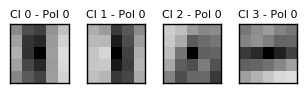

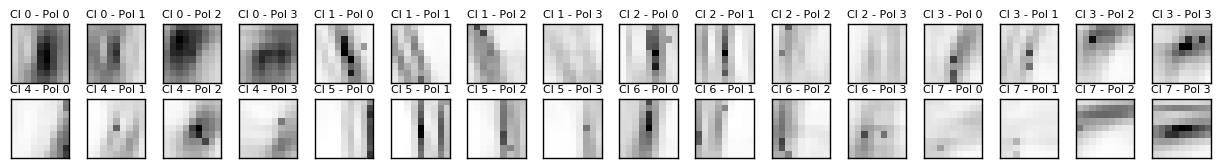

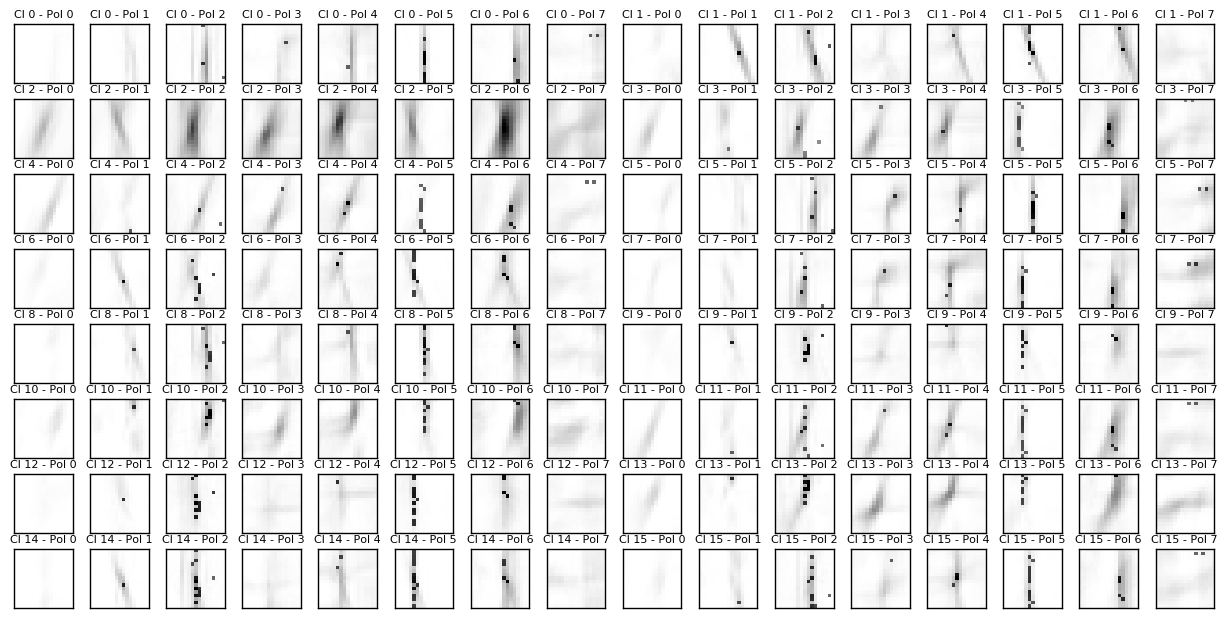

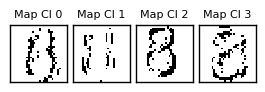

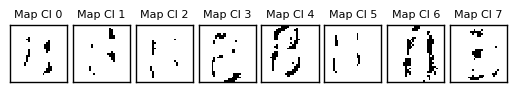

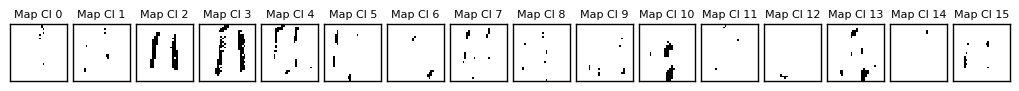

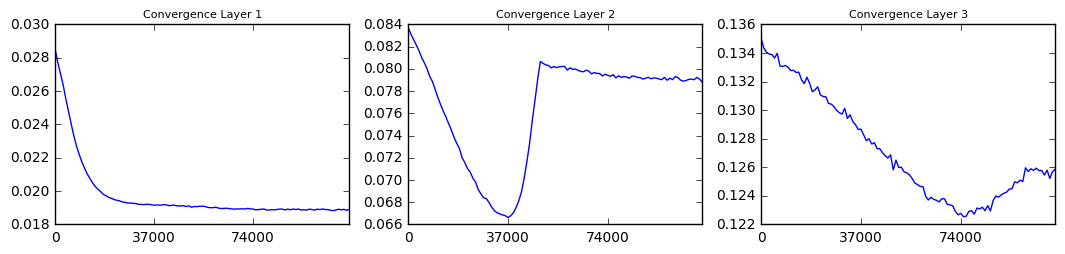

In [5]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=1, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=True)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

In [6]:
ClusterLayer[0].record['error'].values

array([ 0.02850217,  0.02770084,  0.02704108,  0.02635792,  0.02552735,
        0.02477236,  0.02402629,  0.02329747,  0.02268798,  0.02219399,
        0.02174308,  0.0213664 ,  0.02102806,  0.02074871,  0.02048938,
        0.02026976,  0.02011155,  0.01997233,  0.01980572,  0.01972697,
        0.01962351,  0.01957002,  0.01949948,  0.01945022,  0.01942327,
        0.01934852,  0.01933142,  0.01928959,  0.01928409,  0.01926655,
        0.01925743,  0.01921413,  0.01920187,  0.01919391,  0.01920038,
        0.01920828,  0.01917859,  0.01914983,  0.01917117,  0.01915967,
        0.01916979,  0.01919074,  0.0191478 ,  0.01912361,  0.01916786,
        0.01913704,  0.01910747,  0.01911169,  0.01912094,  0.01907406,
        0.01911365,  0.01903389,  0.0190745 ,  0.01907296,  0.01908746,
        0.0190933 ,  0.01908248,  0.01902198,  0.0190057 ,  0.01900363,
        0.01903133,  0.01898567,  0.01895241,  0.01895808,  0.01897416,
        0.01895373,  0.01893177,  0.01892085,  0.01893364,  0.01

## Exp2 :  Homeo Kmeans + Linear Kernel + NoiseFilter(=2) +  2 Polarity in Input 

In [7]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path='../Data/ExtractedStabilized.mat',
                                                        LabelPath='../Data/alphabet_label.pkl',
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = False, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='linear')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='linear')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='linear')
Net = Network([L1,L2,L3])
#Net = Network([L1])#,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000, NbCycle=1.5)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach,accu = Classif0.HistogramDistance()
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_03_HomeoKmeans/Exp2_2017_10_18.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_03_HomeoKmeans/Exp2_2017_10_18.pkl')
    eucli,norma,battach,accu = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 95.00% 
 Normalized Norm 92.50%             
 BattachaNorm 95.00%


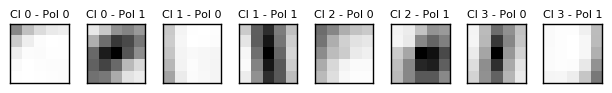

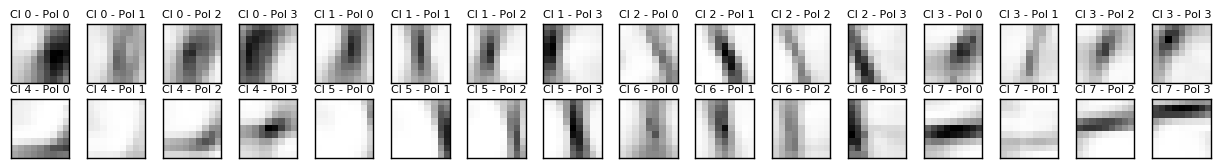

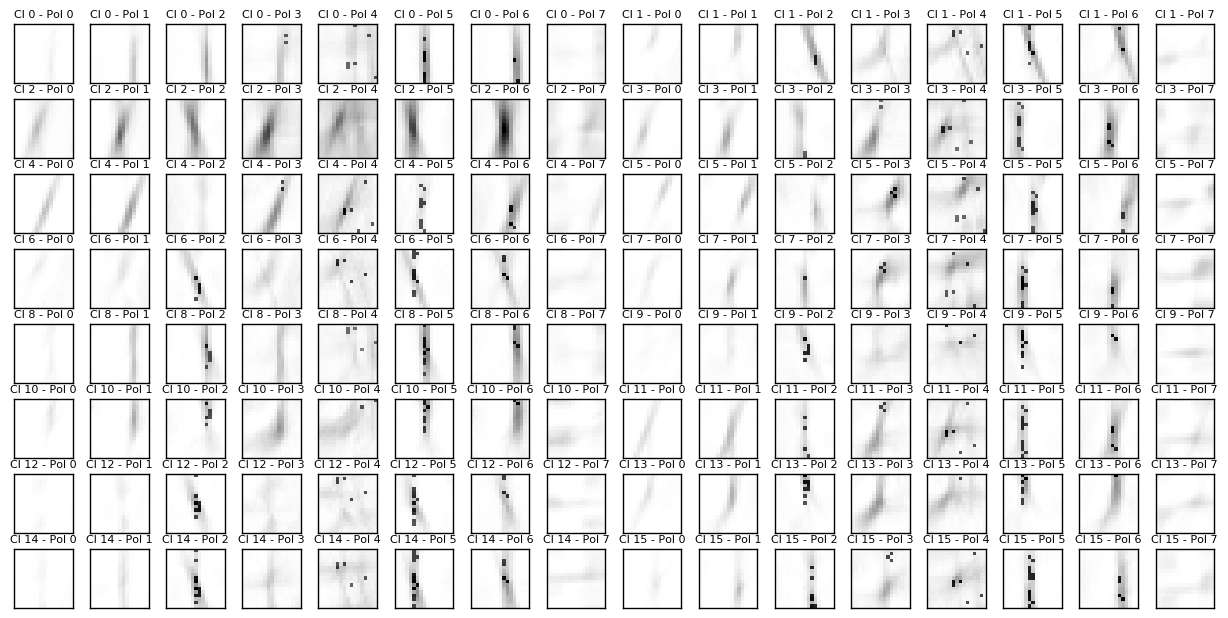

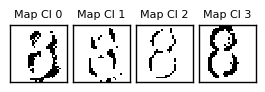

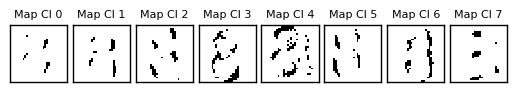

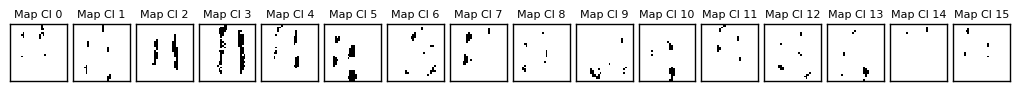

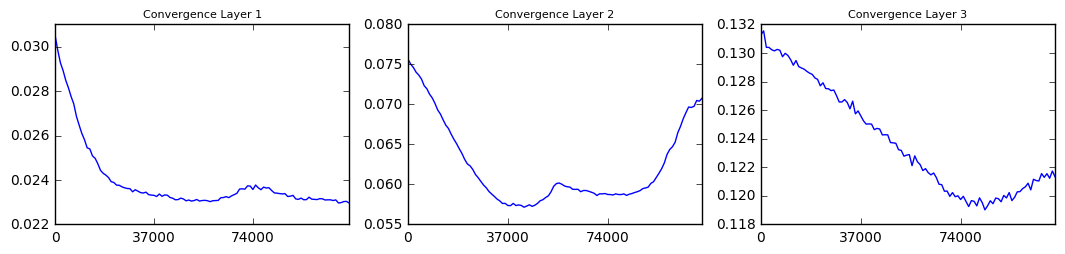

In [8]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)


## Exp3 :  Homeo Kmeans + Exp Kernel + NoiseFilter(=2) +  1 Polarity in Input 

## Exp4 :  Homeo Kmeans + Exp Kernel + NoiseFilter(=2) +  2 Polarity in Input 

In [9]:
save_exp = True
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path='../Data/ExtractedStabilized.mat',
                                                        LabelPath='../Data/alphabet_label.pkl',
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = False, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='exponential')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='exponential')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='homeo',kernel='exponential')
Net = Network([L1,L2,L3])
#Net = Network([L1])#,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000, NbCycle=1.5)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach,accu = Classif0.HistogramDistance()
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_03_HomeoKmeans/Exp4_2017_10_18.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_03_HomeoKmeans/Exp4_2017_10_18.pkl')
    eucli,norma,battach,accu = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 95.00% 
 Normalized Norm 92.50%             
 BattachaNorm 92.50%


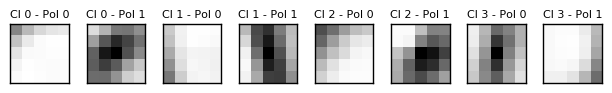

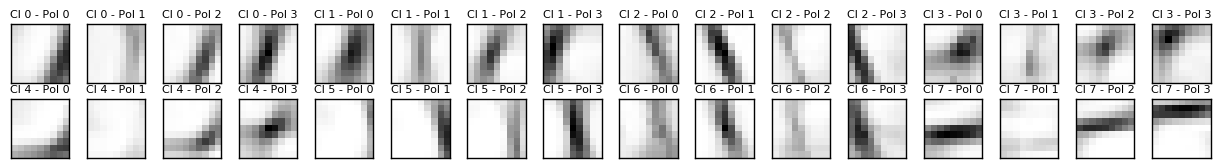

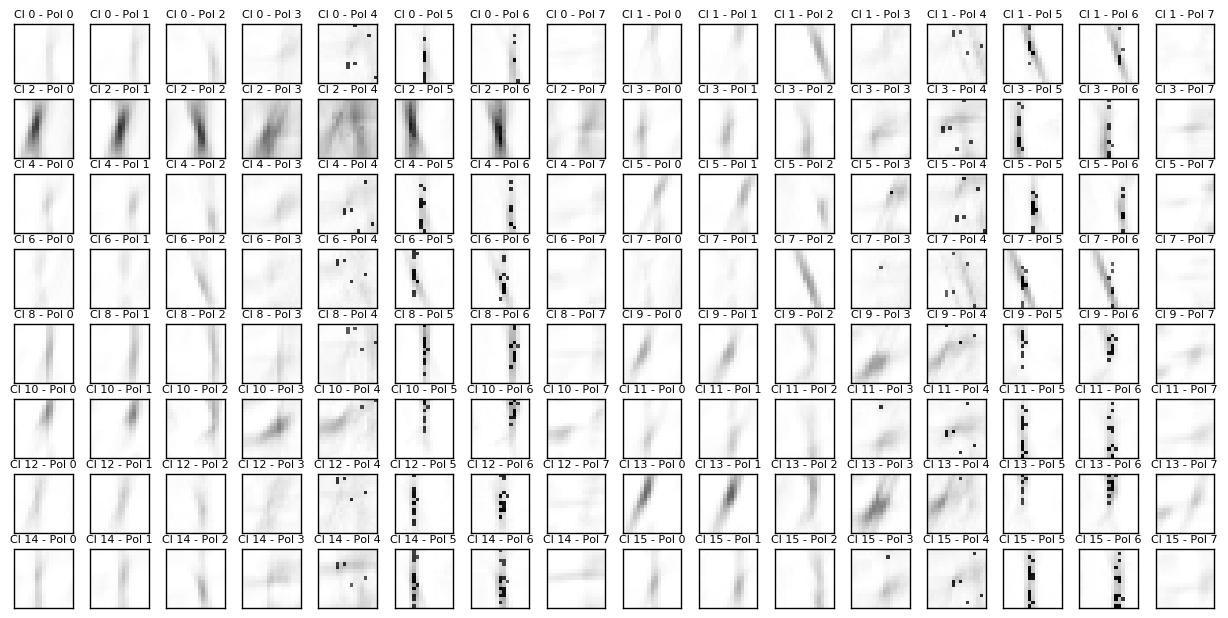

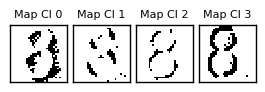

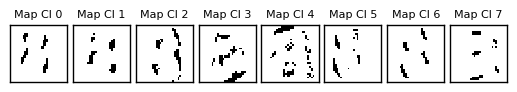

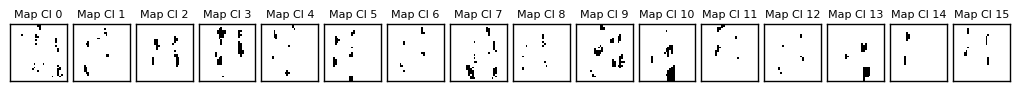

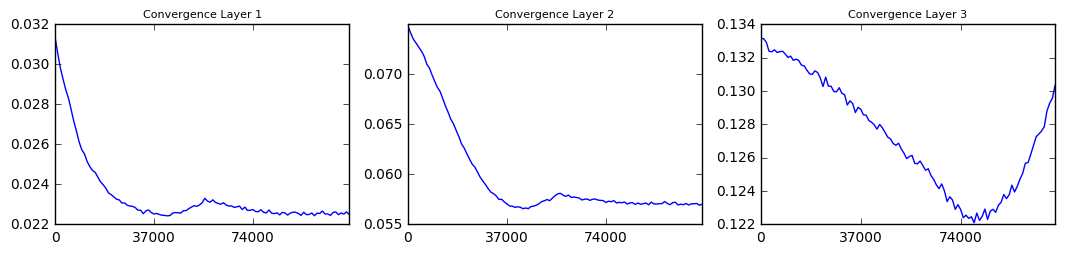

In [10]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)